In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML Projects/Afame Technologies Project/Movie Genre/train_data.txt',
            sep =' ::: ',
            names = ['ID', 'Title', 'Genre', 'Description'],
            engine = 'python',
            encoding = 'utf')

In [ ]:
df.shape

(54214, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
df['Genre'].value_counts()

,count
Genre,
drama,13613
documentary,13096
comedy,7447
short,5073
horror,2204
thriller,1591
action,1315
western,1032
reality-tv,884


In [ ]:
df.Genre.unique()

array(['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime',
       'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy',
       'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western',
       'family', 'mystery', 'history', 'news', 'biography', 'romance',
       'game-show', 'musical', 'war'], dtype=object)

In [ ]:
df['Title'].head(10)

,Title
0,Oscar et la dame rose (2009)
1,Cupid (1997)
2,"Young, Wild and Wonderful (1980)"
3,The Secret Sin (1915)
4,The Unrecovered (2007)
5,Quality Control (2011)
6,"""Pink Slip"" (2009)"
7,One Step Away (1985)
8,"""Desperate Hours"" (2016)"
9,Spirits (2014/I)


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
ID,0
Title,0
Genre,0
Description,0


In [ ]:
df['Title'].sample(10)

,Title
42051,"""Cosmic Collisions"" (2009)"
50140,The Odd Couple (1968)
20788,Their Inner World (2017)
4857,"""BF vs. BFF"" (2014)"
24982,Del vent al blau (2011)
53794,Insight: An Eye on Bucharest's Art Galleries (...
6347,Stay with Me (2016/I)
17927,Shelter Me: New Beginnings (2014)
8591,The Swim (2008)
32467,Purani Haveli (1989)


<ipython-input-12-57ef8c185603>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  genre_distribution  = sns.countplot(df['Genre'],


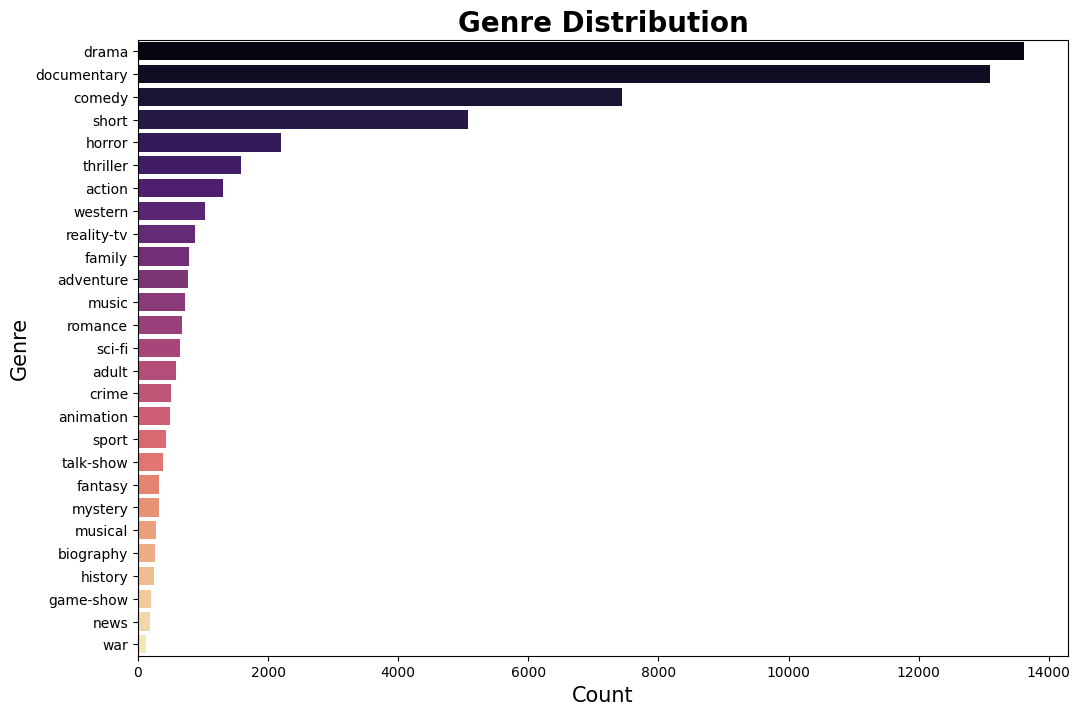

In [ ]:
plt.figure(figsize = (12,8))
genre_distribution  = sns.countplot(df['Genre'],
              order = df['Genre'].value_counts().index,
              palette = 'magma')
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Genre', fontsize = 15)
plt.title('Genre Distribution', fontsize = 20, fontweight = 'bold')
plt.show(genre_distribution)

<ipython-input-13-fe5d8f74d2bd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  genre_distribution_bar  = sns.barplot(x = df['Genre'].value_counts().index,


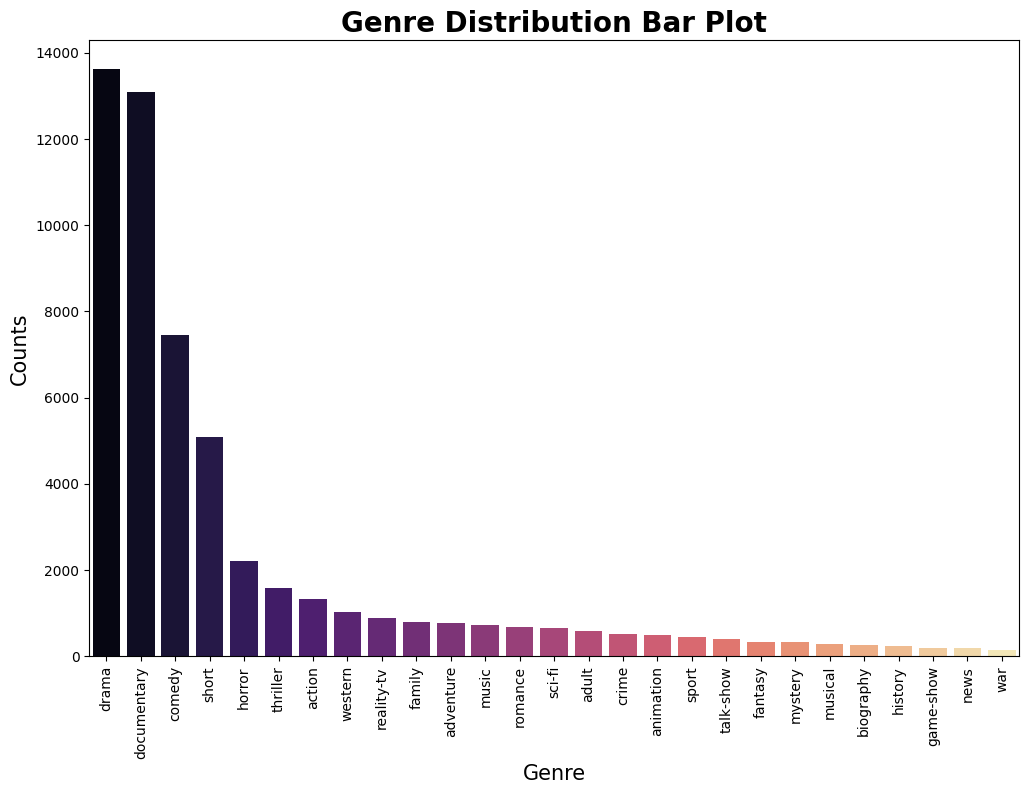

In [ ]:
plt.figure(figsize = (12,8))
genre_distribution_bar  = sns.barplot(x = df['Genre'].value_counts().index,
                                      y = df['Genre'].value_counts(),
                                      palette = 'magma'
                                      )
plt.xticks(rotation = 'vertical')
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.title('Genre Distribution Bar Plot', fontsize = 20, fontweight = 'bold')
plt.show(genre_distribution_bar)

In [ ]:
import re
import string
import nltk
nltk.download('punkt')


from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
from nltk.stem import LancasterStemmer, PorterStemmer
stemmer = LancasterStemmer()
stemmer_1 = PorterStemmer()
stemmer_1.stem("Enjoying")

'enjoy'

In [ ]:
def text_transformation(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)

    new_text = []
    for char in text:
        if char.isalpha() or char == ' ' or char == "'":
            new_text.append(char)
    text = ''.join(new_text)

    words = nltk.word_tokenize(text)

    filtered_words = []
    for word in words:
        if len(word) > 1:
            filtered_words.append(word)
    text = ' '.join(filtered_words)

    no_punct_text = []
    for char in text:
        if char not in string.punctuation:
            no_punct_text.append(char)
    text = ''.join(no_punct_text)

    words = nltk.word_tokenize(text)
    final_words = []
    for word in words:
        if word not in stopwords.words('english') and len(word) > 2:
          root_words = stemmer.stem(word)
          final_words.append(root_words)

    text = ' '.join(final_words)
    text = re.sub(r'\s+', ' ', text).strip()

    return text



In [ ]:
df.sample(10)['Description'].values

array(['With only minutes left to save her sister from ruthless captors intent on making an example, and armed with only her own fierce determination, a lone modern-day warrior marches directly into the line of fire. An expert in martial arts, hand-to-hand combat, and weapons, she will need every ounce of skill if she is to rescue her sister and escape alive. When an unstoppable force faces off against and impenetrable defense, the outcome can only be explosive. But will it be enough?',
       "Kathe Kollwitz was 47 years old, and already a well established artist in Germany and abroad when Peter, her youngest son, volunteered to join the German army in WWI and was killed two weeks later. This painful tragedy changed Kollwitz's life and art forever.",
       'COAL INDIA is a cinematic essay on physical labour and its cyclical movements. It portrays people who work under pre-industrial conditions in the coalfields near Dhanbad, India. The film shows heaviest physical labour which become

In [ ]:
text_transformation("""Chile 2006, a country that maintains the same public policies of the dictatorship of Augusto Pinochet. After 16 years in a state of democracy, young chileans still do not see any changes in the education system, so they decide to manifest in the streets starting a movement that finally manages to mobilize a nation. The transition is over. Will they be able to change the future of Chile?',
       "Matisse has trouble trying to get a date with Ashlee Simpson. So he's set for the very next best thing. Matisse is given the opportunity to date not one, but 6 die hard Ashlee Simpson Fans. Being put through different tasks, to figure out their strengths, he will decide which one will be My Own Ashlee Simpson.",
       "A four-handed melodrama: Kedar (Hafizji) asks Madhavi (R. Bai) to leave home so that he may marry the rich Chandra (Pramila). But Chandra is only obeying her parents: in fact she loves the painter Kumar (Vinayak). Madhavi, now a beggar singing for alms, becomes Kumar's model and lover while Chandra tries to get away from Kedar. She enlists Kumar's help, pushing Madhavi out again. The latter becomes a stage actress while the distraught Kumar becomes a mad street singer. Eventually, Madhavi and Kumar get married.",
       'Bestowed in the legacies of the Maharaja\'s and with an abundance of magnificent palaces and forts, the state of Rajasthan shows the country of India at its most colorful and exotic best. Be it the people, lifestyle or the mystical charm - India has always amazed the world with her magic; exhibiting splendor and royalty in every walk of life. Indulge your senses as Christina Cindrich takes you on an unforgettable journey through the "Land of the Kings".'""")

'chil country maintain publ policy dict augusto pinochet year stat democr young chil stil see chang educ system decid manifest streets start mov fin man mobl nat transit abl chang fut chil matiss troubl try get dat ashl simpson set next best thing matiss giv opportun dat on die hard ashl simpson fan put diff task fig strengths decid on ashl simpson fourhand melodram ked hafizj ask madhav bai leav hom may marry rich chandr pramil chandr obey par fact lov paint kum vinayak madhav begg sing alm becom kum model lov chandr tri get away ked enl kum help push madhav lat becom stag actress distraught kum becom mad street sing ev madhav kum get marry bestow leg maharaj abund magn palac fort stat rajasth show country ind col exot best peopl lifestyl myst charm ind alway amaz world mag exhibit splendor royal every walk lif indulg sens christina cindrich tak unforget journey land king'

In [ ]:
df.sample(10)

,ID,Title,Genre,Description
31471,31472,Without Warning: The James Brady Story (1991),drama,"Based on a true story, this film focuses on 'J..."
49596,49597,Trespassers (2006),horror,Tyler is a surfer who constantly searches for ...
9396,9397,"""Railway Story"" (1990)",reality-tv,The beginning of Part-4 over the spectacular v...
13636,13637,Welcome to Canada (2012),documentary,Canada has a diverse and rich heritage as a de...
52737,52738,The Deserted (2006),drama,"On the long and winding road of life, the marr..."
21219,21220,Washington Irving: An American Original (2020),documentary,Washington Irving was the first true American-...
7911,7912,And Rosemary Is for Remembrance (2016),documentary,Shirley never imagined that she would receive ...
18072,18073,T (????),drama,"Follows Terrence, a transgender male who has r..."
34907,34908,"""M2D's Livin' the Dream"" (2008)",reality-tv,M2D's Livin' the Dream is a new outdoor progra...
3048,3049,"Double Pleasure, Double Pain (2008)",drama,"Kyla, a 26 year old African American woman rem..."


In [ ]:
from tqdm import tqdm
tqdm.pandas()
df['Transformed Text'] = df['Description'].progress_apply(text_transformation)

  0%|          | 119/54214 [00:04<30:57, 29.12it/s]


KeyboardInterrupt: 

In [ ]:
df.sample(10)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['Description'])

y = le.fit_transform(df['Genre'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from tqdm import tqdm

mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression()
svc = SVC()



clfs = {
    'MNB' : mnb,
    'BNB' : bnb,
    'LR' : lr,
    'SVC' : svc,

}




def hybrid_model(clf, x_train, x_test, y_train, y_test):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)


  return accuracy


accuracy_scores = []


for name, clf in tqdm(clfs.items(), desc="Evaluating models"):
  model_accuracy = hybrid_model(clf, x_train, x_test, y_train, y_test)


  accuracy_scores.append(model_accuracy)



model_performance_df_using_countvectorizer = pd.DataFrame({
    "Algorithm": clfs.keys(),
    "Accuracy Score": accuracy_scores,
}).sort_values('Accuracy Score',ascending = False)



model_performance_df_using_countvectorizer



Evaluating models:  50%|█████     | 2/4 [00:01<00:01,  1.09it/s]/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Evaluating models: 100%|██████████| 4/4 [1:45:33<00:00, 1583.30s/it]


,Algorithm,Accuracy Score
2,LR,0.588398
3,SVC,0.577331
1,BNB,0.496265
0,MNB,0.446924
